# TITANIC - MACHINE LEARNING COMPETITION

#### Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Exploratory Data Analysis

In [2]:
#removing Name and Ticket Number columns from the training data 
train_df = pd.read_csv('/kaggle/input/titanic/train.csv').drop(columns = ['Name','Ticket'])
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


### 1.1 Null Values on the data.

In [3]:
#Identifying the null values on dataset.
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 1.2.1 Feature Exploration
#### 1.2.1 Gender 

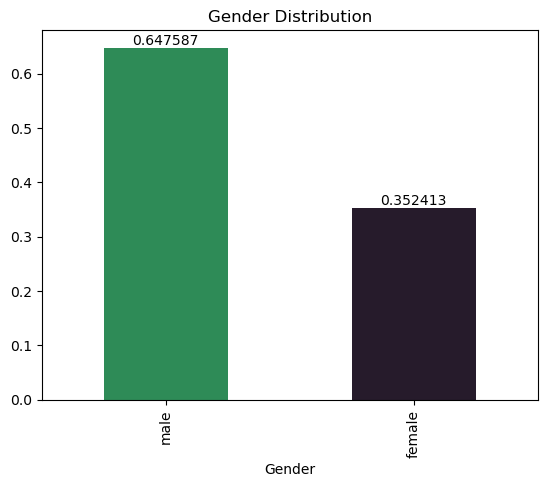

In [4]:
ax = train_df.value_counts('Sex', normalize = True).plot(kind = 'bar', color = ['seagreen','#261b2b'], xlabel = 'Gender', title = 'Gender Distribution')

#labeling the values for each column in the chart
for i in ax.containers:
    ax.bar_label(i)

#### **MALE**: 64.8%           
#### **FEMALE**: 35.2%

#### 1.2.2 Age

Text(0.5, 1.0, 'Histogram by age')

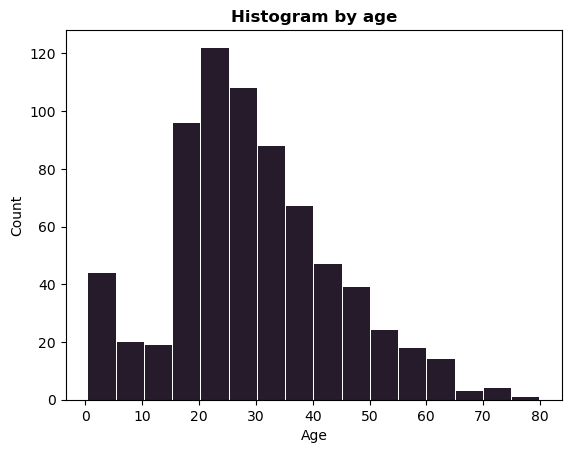

In [5]:
#create an histogram 
import math 
max(train_df['Age'])
plt.hist(train_df['Age'], bins = 16, color = '#261b2b', rwidth = 0.96, density = False)
plt.xlabel('Age')
plt.ylabel('Count')
 
plt.title('Histogram by age',
          fontweight = "bold")

From the known passenger's age, about **18% of them had 20-25 y.o**.

However, it is important to keep in mind there's **177 unlabeled passengers**.

#### 1.2.3 Embarked Port

In [6]:
#counting how many passangers embarked in each port.
train_df['Embarked'].value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

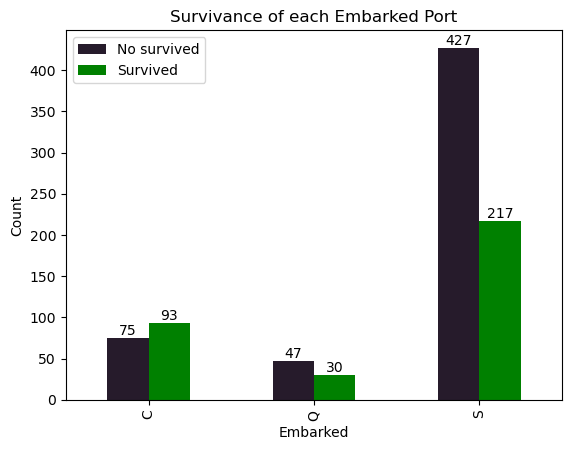

In [7]:
#group the passangers by ticket class
class_embarked = train_df.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)

#plotting the Survivance vs Embarked Port chart 
graphEmbarked = class_embarked.plot(kind='bar', color = ['#261b2b','green'], xlabel = 'Embarked', ylabel = 'Count', title = 'Survivance of each Embarked Port')

#labeling the values for each column in the chart.
for i in graphEmbarked.containers:
    graphEmbarked.bar_label(i)

#legends
graphEmbarked.legend(['No survived','Survived'])

#### C: Cherbourg ----- Q: Queenstown ----- S: Southampton

#### 1.2.4 Passenger Class

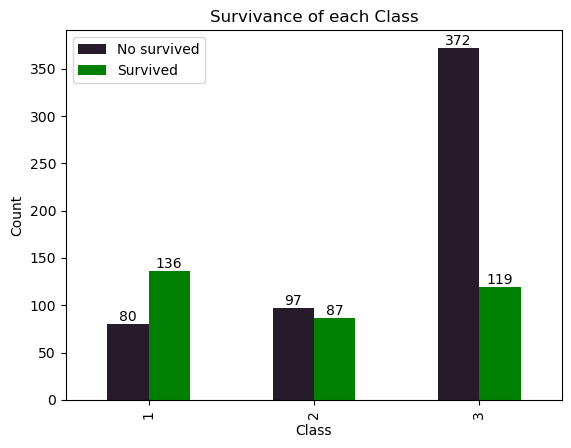

In [8]:
#group the passangers by ticket class
class_surv = train_df.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)

#plotting the Survivance vs Class chart
graphClass = class_surv.plot(kind='bar', color = ['#261b2b','green'], xlabel = 'Class', ylabel = 'Count', title = 'Survivance of each Class',)

#labeling the values for each column in the chart.
for i in graphClass.containers:
    graphClass.bar_label(i)

#legends 
graphClass.legend(['No survived','Survived'])

In [9]:
#create an organized table showing how many passangers are in each category.
class_embarked = train_df.groupby(['Pclass','Embarked', 'Survived']).size().unstack(fill_value=0)
class_embarked

Survived           0   1
Pclass Embarked         
1      C          26  59
       Q           1   1
       S          53  74
2      C           8   9
       Q           1   2
       S          88  76
3      C          41  25
       Q          45  27
       S         286  67

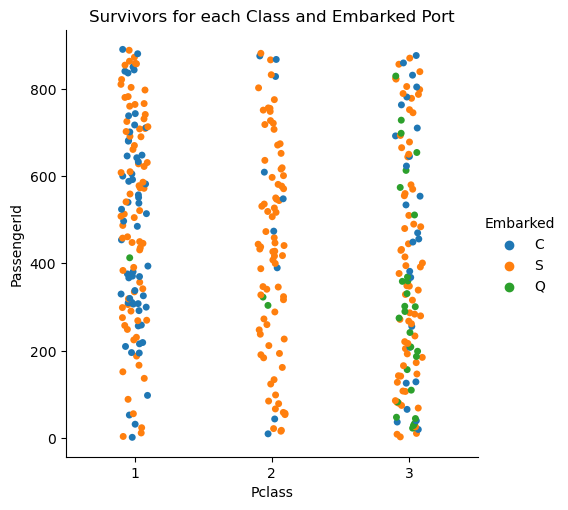

In [10]:
#create a dataframe with only the survivors
survived_df = train_df [train_df [ 'Survived'] == 1] 

#chart with the survivors according to the class and port
g = sns.catplot(data = survived_df, x = 'Pclass', y = 'PassengerId', hue = 'Embarked').set(title = 'Survivors for each Class and Embarked Port')